In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv(r"D:\Shreya DA Projects\EDA on Retail Sales Data [ L1 ] P1\Warehouse_and_Retail_Sales.csv")
df.head() # preview data


,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


In [3]:
# dataset shape
print("Rows, Columns:", df.shape)
# column names
print(df.columns)
# data types & null values
df.info()


Rows, Columns: (307645, 9)
Index(['YEAR', 'MONTH', 'SUPPLIER', 'ITEM CODE', 'ITEM DESCRIPTION',
       'ITEM TYPE', 'RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307645 entries, 0 to 307644
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              307645 non-null  int64  
 1   MONTH             307645 non-null  int64  
 2   SUPPLIER          307478 non-null  object 
 3   ITEM CODE         307645 non-null  object 
 4   ITEM DESCRIPTION  307645 non-null  object 
 5   ITEM TYPE         307644 non-null  object 
 6   RETAIL SALES      307642 non-null  float64
 7   RETAIL TRANSFERS  307645 non-null  float64
 8   WAREHOUSE SALES   307645 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 21.1+ MB


In [5]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Convert YEAR & MONTH to Date
df['DATE'] = pd.to_datetime(
    df['YEAR'].astype(str) + '-' + df['MONTH'].astype(str) + '-01'
)

df.head()


,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,DATE
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0,2020-01-01
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0,2020-01-01
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0,2020-01-01
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0,2020-01-01
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0,2020-01-01


In [6]:
print("Mean:", df['RETAIL SALES'].mean())
print("Median:", df['RETAIL SALES'].median())
print("Mode:", df['RETAIL SALES'].mode()[0])
print("Standard Deviation:", df['RETAIL SALES'].std())


Mean: 7.024071388171967
Median: 0.32
Mode: 0.0
Standard Deviation: 30.98623787591487


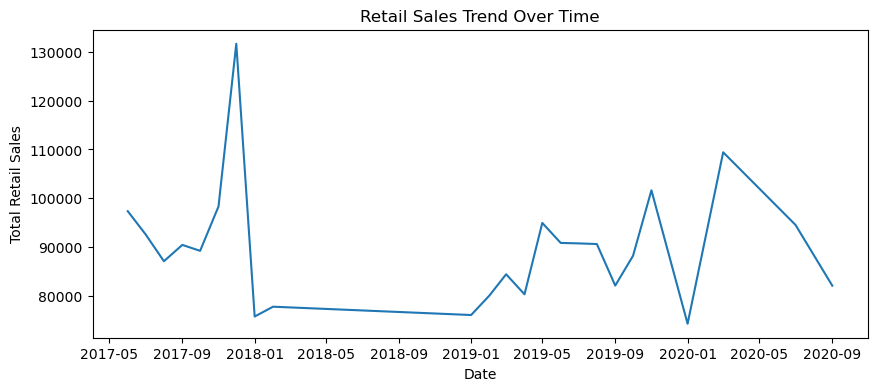

In [7]:
monthly_sales = df.groupby('DATE')['RETAIL SALES'].sum()

plt.figure(figsize=(10,4))
plt.plot(monthly_sales)
plt.title("Retail Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Retail Sales")
plt.show()


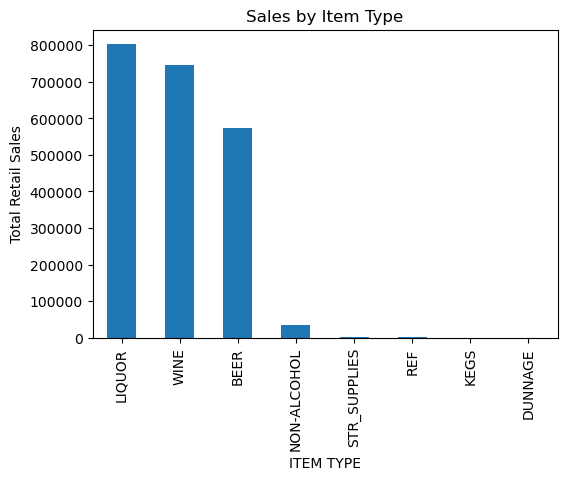

In [8]:
# Item Type Analysis (Beer, Wine, etc.)
item_type_sales = df.groupby('ITEM TYPE')['RETAIL SALES'].sum().sort_values(ascending=False)

plt.figure(figsize=(6,4))
item_type_sales.plot(kind='bar')
plt.title("Sales by Item Type")
plt.ylabel("Total Retail Sales")
plt.show()


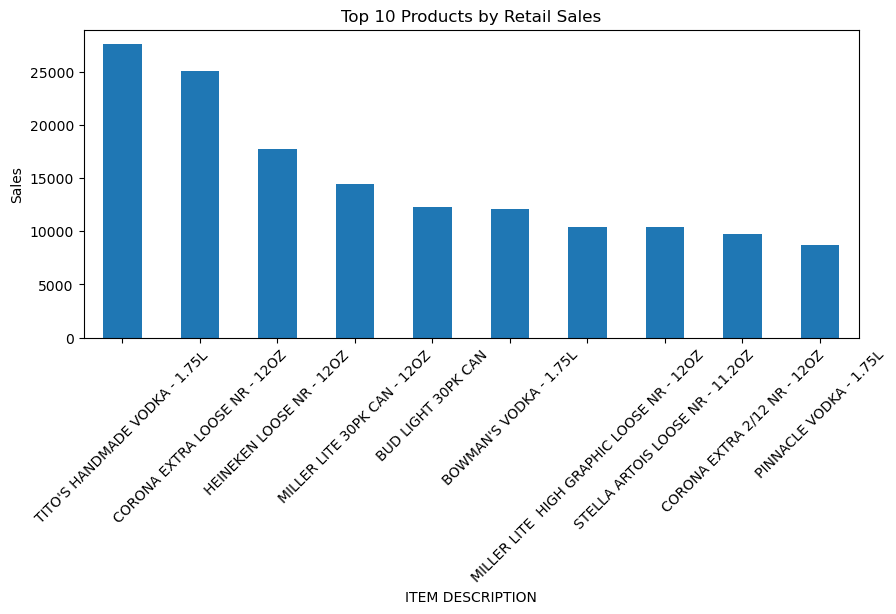

In [9]:
# Top 10 Products
top_products = df.groupby('ITEM DESCRIPTION')['RETAIL SALES'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,4))
top_products.plot(kind='bar')
plt.title("Top 10 Products by Retail Sales")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()

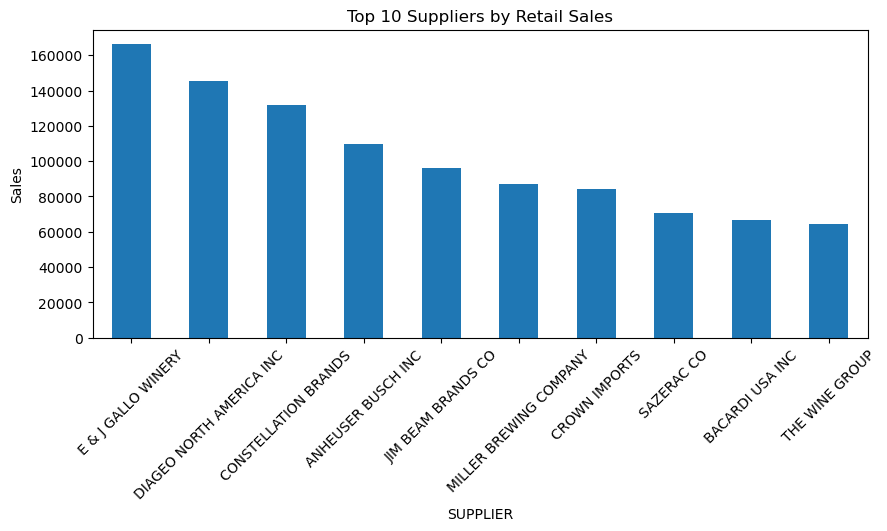

In [10]:
#Supplier Analysis
top_suppliers = df.groupby('SUPPLIER')['RETAIL SALES'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,4))
top_suppliers.plot(kind='bar')
plt.title("Top 10 Suppliers by Retail Sales")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()


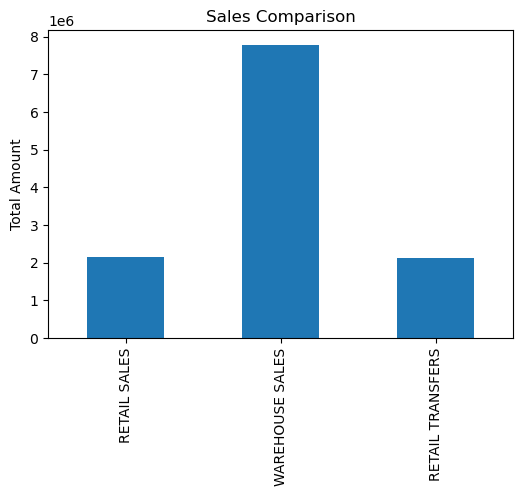

In [12]:
# Retail vs Warehouse Sales
sales_compare = df[['RETAIL SALES', 'WAREHOUSE SALES', 'RETAIL TRANSFERS']].sum()

plt.figure(figsize=(6,4))
sales_compare.plot(kind='bar')
plt.title("Sales Comparison")
plt.ylabel("Total Amount")
plt.show()


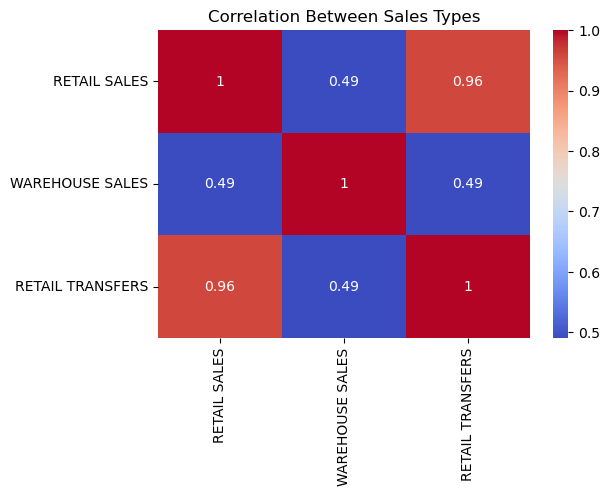

In [14]:
# Correlation Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(
    df[['RETAIL SALES', 'WAREHOUSE SALES', 'RETAIL TRANSFERS']].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title("Correlation Between Sales Types")
plt.show()